# Trabajo Práctico: Modelado Comparativo en Minería de Datos


Se utilizara color 🟡 para visualizaciones compartidas

Se utilizara color 🔵 para visualizaciones unicamente de regresion

Se utilizara color 🟢 para visualizaciones unicamente de clasificacion

## 1. Importación de librerias



In [2]:
# Importamos las librerías

import pandas as pd  # para trabajar con datos en forma de tabla
import numpy as np   # para operaciones numéricas

from scipy.stats import f_oneway   # para realizar pruebas estadísticas ANOVA entre grupos

import matplotlib.pyplot as plt  # para hacer gráficos
import seaborn as sns            # para gráficos más completos

from sklearn.preprocessing import StandardScaler, LabelEncoder  # para preparar los datos
from sklearn.model_selection import train_test_split  # para dividir en train y test
from sklearn.decomposition import PCA  # para reducción de dimensionalidad
from sklearn.feature_selection import SelectKBest, f_classif  # para seleccionar las variables numéricas más relevantes en clasificación

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression            # modelo de regresión logística
from sklearn.tree import DecisionTreeClassifier                # clasificador tipo árbol de decisión
from sklearn.ensemble import RandomForestClassifier            # clasificador de bosque aleatorio
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # métricas de evaluación


# Métricas para clasificación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selección de variables (opcional según análisis)
from sklearn.feature_selection import SelectKBest, chi2

## 2. Carga del dataset


In [3]:
from google.colab import files

uploaded = files.upload()

Saving student_habits_performance_2.csv to student_habits_performance_2.csv


In [4]:
# Cargamos el nuevo archivo CSV (delimitado por comas)
df = pd.read_csv('student_habits_performance_2.csv')

## 3. Resumen y Tratamiento de Datos Inicial


### 3.1 Resumen general del dataset y características


In [5]:
# ========================
# 1. Dimensiones del dataset
# ========================
print("1. Dimensiones del dataset")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# ========================
# 2. Primeras filas del dataset
# ========================
print("2. Primeras filas del dataset")
display(df.head())
print("-" * 50)

# ========================
# 3. Información general del dataset
# ========================
print("3. Información general del dataset")
df.info()
print("-" * 50)

1. Dimensiones del dataset
Filas: 10000  |  Columnas: 16
--------------------------------------------------
2. Primeras filas del dataset


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


--------------------------------------------------
3. Información general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     10000 non-null  object 
 1   age                            10000 non-null  int64  
 2   gender                         10000 non-null  object 
 3   study_hours_per_day            10000 non-null  float64
 4   social_media_hours             10000 non-null  float64
 5   netflix_hours                  10000 non-null  float64
 6   part_time_job                  10000 non-null  object 
 7   attendance_percentage          10000 non-null  float64
 8   sleep_hours                    10000 non-null  float64
 9   diet_quality                   10000 non-null  object 
 10  exercise_frequency             10000 non-null  int64  
 11  parental_education_le

In [6]:
# ========================
# 4. Valores nulos por columna
# ========================
print("4. Valores nulos por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]

if not nulls.empty:
    print("Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# ========================
# 5. Filas duplicadas
# ========================
print("5. Filas duplicadas")
print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")
print("-" * 50)

# ========================
# 6. Categorías únicas por variable categórica
# ========================
print("6. Categorías únicas por cada variable categórica")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categorías):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos por columna
Se encontraron columnas con valores nulos:


,Valores nulos
parental_education_level,952


--------------------------------------------------
5. Filas duplicadas
Cantidad de filas duplicadas: 0
--------------------------------------------------
6. Categorías únicas por cada variable categórica

 student_id (1000 categorías):
student_id
S1725    21
S1775    19
S1072    19
S1890    19
S1038    19
         ..
S1696     3
S1239     3
S1218     3
S1023     2
S1544     2
Name: count, Length: 1000, dtype: int64
------------------------------

 gender (3 categorías):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categorías):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categorías):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (3 categorías):
parental_education_level
High School    3929
Bachelor       3463
Master         1656
Name: count, dtype: i

A partir del análisis exploratorio realizado, se obtienen las siguientes observaciones clave:

- **Cantidad de datos:** el dataset cuenta con 10,000 registros y 16 columnas, una cantidad adecuada para aplicar técnicas de clasificación de forma robusta.

- **Tipos de variables:** se identifican variables numéricas (`int64`, `float64`) como `age`, `study_hours_per_day`, `exam_score`, y variables categóricas (`object`) como `gender`, `diet_quality`, `internet_quality`, entre otras. Esta combinación favorece el uso de diferentes tipos de modelos y técnicas de preprocesamiento.

- **Primeras filas:** los datos iniciales presentan valores lógicos y bien distribuidos, sin errores de carga visibles.

- **Valores nulos:** se detectaron 952 valores nulos en la variable `parental_education_level`, representando un 9.5% del total. Este porcentaje es manejable, y se optará por imputarlos con una categoría adicional denominada `"No declarado"` para no eliminar datos ni introducir supuestos artificiales.

- **Filas duplicadas:** no se encontraron registros duplicados en el dataset (`0` filas duplicadas), lo que refleja una buena calidad estructural.

- **Formato general:** los nombres de las columnas son claros y coherentes con los datos que representan. No se identifican errores de formato ni estructuras inconsistentes.

- **Categorías únicas:** se revisaron todas las variables categóricas:
  - `student_id`: contiene 10000 valores únicos (uno por estudiante), por lo tanto, no será útil como predictor y será eliminado.
  - Variables como `gender`, `part_time_job`, `diet_quality`, `internet_quality`, etc., tienen un número reducido de categorías y están listas para ser codificadas posteriormente.

### 3.2 Tratamiento Inicial de los Datos (Preprocesamiento Básico)

#### 3.2.1 Eliminación de columna no informativa: `student_id`



La columna `student_id` contiene identificadores únicos para cada estudiante y no aporta valor predictivo al modelo. Al tratarse de una variable sin relación directa con el rendimiento académico, se procede a eliminarla del dataset.

In [7]:
df.drop(columns=["student_id"], inplace=True)

#### 3.2.2 Imputación de valores nulos



Se detectaron valores nulos en la variable `parental_education_level`, que representa el nivel educativo de los padres. Para evitar eliminar registros, se imputan estos valores con una nueva categoría `"No declarado"`, dejando explícito que dicha información no fue proporcionada.


In [8]:
# Imputar valores nulos en parental_education_level
df["parental_education_level"] = df["parental_education_level"].fillna("No declarado")

#### 3.2.3 Transformación de la variable objetivo  🟢 Clasificación  



Como se trabajará con modelos de clasificación, se transforma la variable continua `exam_score` en una variable categórica denominada `exam_performance`, con tres clases:

- **Bajo**: score < 50  
- **Medio**: 50 ≤ score < 80  
- **Alto**: score ≥ 80

Esta nueva variable será la que intentaremos predecir mediante distintos modelos de clasificación.

In [9]:
# Crear variable categórica de clasificación: exam_performance
def clasificar_rendimiento(score):
    if score < 50:
        return "Bajo"
    elif score < 80:
        return "Medio"
    else:
        return "Alto"

df["exam_performance"] = df["exam_score"].apply(clasificar_rendimiento)

### 3.3 Dataset Preprocesado

In [10]:
# 1. Primeras filas para ver  la eliminación de la columna no imformativa student_id y la transformación de la variable objetivo
print("1. Primeras filas del dataset actualizado")
display(df.head())
print("-" * 50)

# ========================
# 2. Valores nulos por columna
# ========================
print("2. Valores nulos por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]

if not nulls.empty:
    print("Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)



1. Primeras filas del dataset actualizado


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,exam_performance
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,Medio
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Alto
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Bajo
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Bajo
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,Medio


--------------------------------------------------
2. Valores nulos por columna
No se encontraron valores nulos.
--------------------------------------------------


**Revisión del Dataset Preprocesado**

Columnas modificadas o eliminadas:

Se eliminó la columna student_id, considerada no informativa para el análisis.

Se imputaron los valores nulos de parental_education_level con la categoría "No declarado", aunque en el dataset final ya no quedaron valores nulos visibles.

Valores nulos restantes:

No se encontraron valores nulos en ninguna de las columnas del dataset, lo que indica un tratamiento correcto en la imputación.

Primer vistazo a los datos:

Las primeras filas del dataset muestran un formato limpio, sin identificadores innecesarios.

Las columnas presentan valores coherentes y listos para el análisis posterior.



## 4. Análisis Exploratorio de Datos (EDA)



### 4.1 Estadísticas descriptivas generales



Se analiza un resumen estadístico de las variables numéricas del dataset, junto con el conteo de categorías presentes en las variables cualitativas.

In [32]:
# Resumen de variables numéricas
df.describe().style\
    .set_caption("Estadísticas Descriptivas de Variables Numéricas")\
    .background_gradient(cmap='YlOrBr')\
    .format(precision=2)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,20.50,3.54,2.52,1.84,83.88,6.48,3.03,5.43,69.50
std,2.33,1.45,1.16,1.04,9.20,1.21,2.05,2.88,16.69
min,12.00,0.00,0.00,0.00,56.00,3.20,-4.00,-4.00,18.40
25%,19.00,2.55,1.72,1.08,77.62,5.67,2.00,3.00,58.31
50%,21.00,3.55,2.51,1.80,84.25,6.49,3.00,5.00,70.10
75%,22.00,4.50,3.30,2.55,90.64,7.30,4.00,7.00,81.14
max,30.00,8.30,7.20,5.40,100.00,10.00,11.00,16.00,100.00


Este resumen estadístico permite observar la escala y dispersión de las variables numéricas en el dataset. Podemos ver que las medias, medianas y rangos son razonables, y que no existen valores extremos evidentes que requieran corrección inmediata.

### 4.2 Distribución de la variable objetivo `exam_performance` 🟢 Clasificacion



La variable objetivo `exam_performance` fue generada a partir de `exam_score` y representa tres niveles de rendimiento: **Bajo**, **Medio** y **Alto**.  
Se analiza su distribución para verificar el equilibrio entre clases.

/tmp/ipython-input-40-1470261739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="exam_performance",palette="BuGn_r")


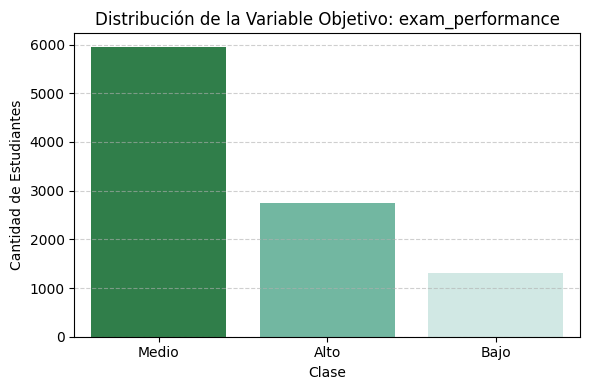

,Cantidad,Porcentaje (%)
exam_performance,,
Medio,5945,59.45
Alto,2740,27.40
Bajo,1315,13.15


In [40]:
# Conteo de clases
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="exam_performance",palette="BuGn_r")
plt.title("Distribución de la Variable Objetivo: exam_performance")
plt.xlabel("Clase")
plt.ylabel("Cantidad de Estudiantes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Tabla con conteo y porcentaje
target_counts = df["exam_performance"].value_counts()
target_percent = round(df["exam_performance"].value_counts(normalize=True) * 100, 2)

summary_df = pd.DataFrame({
    "Cantidad": target_counts,
    "Porcentaje (%)": target_percent
})

summary_df.style.set_caption(" Distribución de Clases en 'exam_performance'")\
    .background_gradient(cmap='BuGn')\
    .format(precision=2)


 **Análisis**

La distribución de clases en la variable exam_performance muestra un predominio de la clase "Medio", seguido por "Alto" y "Bajo". Aunque hay cierto desbalance, especialmente con la clase "Bajo", el dataset sigue siendo utilizable sin necesidad inmediata de técnicas de balanceo.

La tabla confirma visualmente la distribución observada en el gráfico. Se puede considerar el uso de métricas como f1-score o estrategias como SMOTE si el rendimiento en modelos se ve afectado por este desbalance.

### 4.3 Visualización de distribuciones de variables


#### 🟢Clasificacion


Se analizan las distribuciones de las variables predictoras numéricas mediante histogramas, con el fin de identificar sesgos, asimetrías y posibles valores atípicos. Estas visualizaciones también ayudan a comprender cómo están distribuidos los datos que alimentarán los modelos de clasificación.

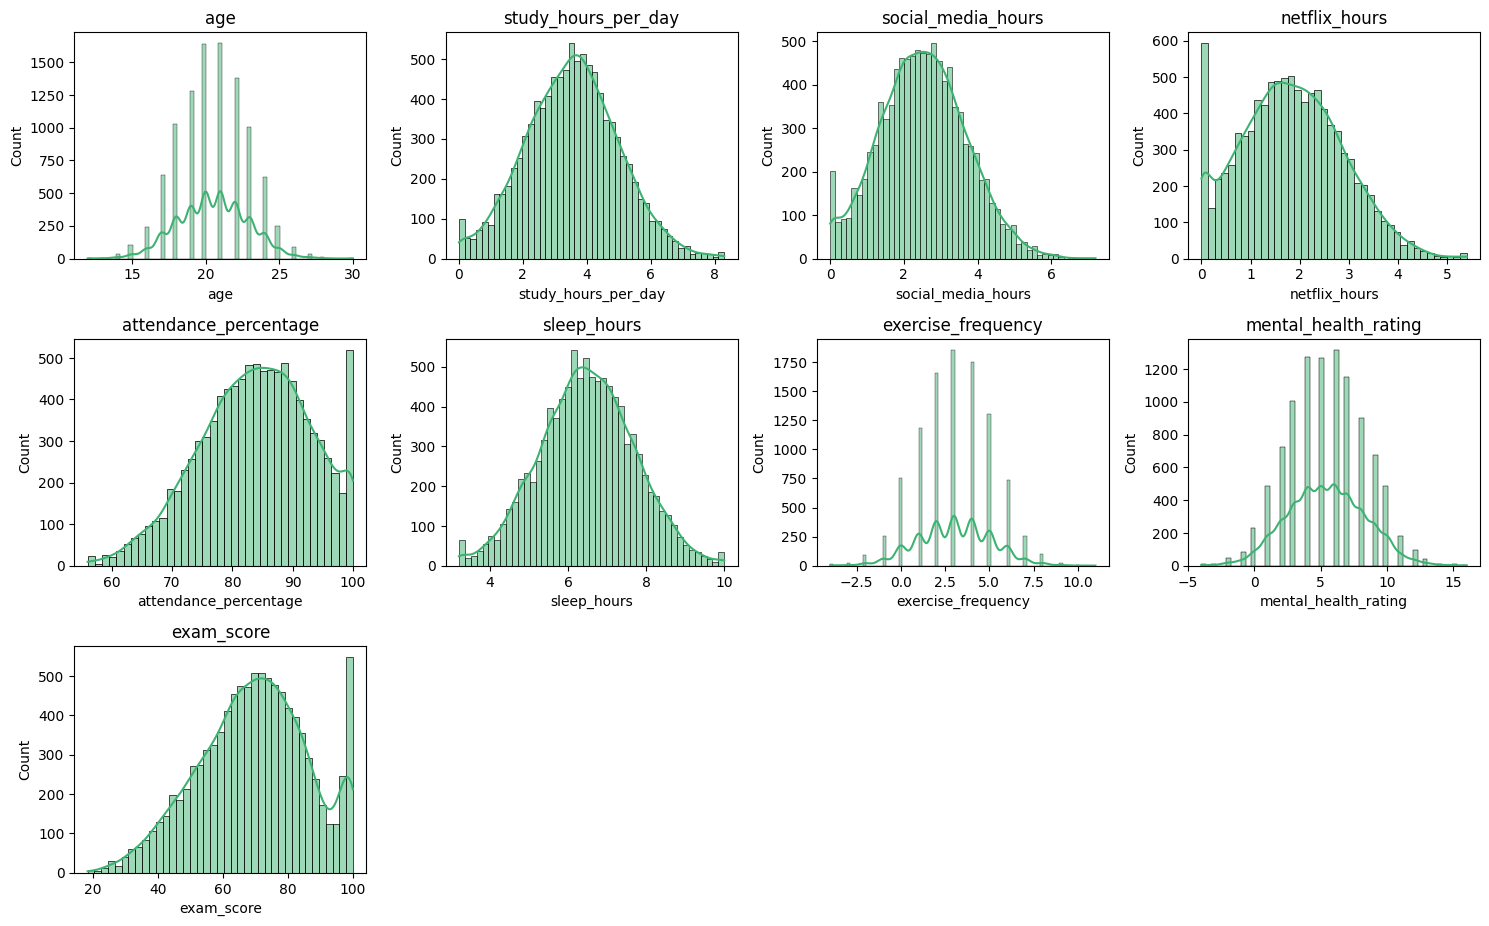

In [30]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Histograma de todas las variables numéricas
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=col, kde=True, color="mediumseagreen")
    plt.title(col)
    plt.tight_layout()

 **Análisis de distribuciones**  
Se muestran las distribuciones de las variables numéricas que serán usadas para predecir `exam_performance`. Se destacan los siguientes aspectos:

- **Variables como `age` y `sleep_hours`** están distribuidas de forma razonablemente simétrica, lo que puede facilitar su uso en modelos lineales o árboles.
- **Asimetría**: Variables como `social_media_hours`, `netflix_hours` y `study_hours_per_day` están sesgadas positivamente. Esto podría afectar a algunos modelos sensibles a la escala y normalidad.
- **`exercise_frequency`** tiene una forma claramente discreta, lo cual será tenido en cuenta en la codificación.
- Estas distribuciones permitirán comparar si los distintos niveles de rendimiento (`Bajo`, `Medio`, `Alto`) tienen relaciones particulares con los predictores. Esto se complementará luego con análisis por clase (boxplots).

El análisis exploratorio confirma que las variables tienen comportamiento diverso y por tanto requieren preprocesamiento cuidadoso para los modelos de clasificación.

#### 🔵Regresion

Se exploran las variables predictoras numéricas a través de histogramas con curva de densidad (KDE). Este análisis visual permite observar posibles sesgos, simetrías o rangos de valores extremos que podrían afectar la calidad del modelo de regresión.

In [ ]:
# Selección de columnas numéricas
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Histograma para cada variable numérica
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color="steelblue")
    plt.title(col)
    plt.tight_layout()

**Análisis de distribuciones**
Las gráficas muestran la distribución de cada variable numérica. Se observan los siguientes patrones generales:

Distribución normal/aproximada: Variables como age, sleep_hours, mental_health_rating presentan distribuciones más simétricas.
Asimetría positiva o sesgo a la derecha: Se observa en study_hours_per_day, social_media_hours, netflix_hours, lo cual sugiere que la mayoría estudia/pasa tiempo en redes menos horas, con algunos valores extremos altos.
exercise_frequency muestra una distribución discreta con valores enteros. Puede necesitar normalización o ser tratada como ordinal.
La variable exam_score presenta una distribución ligeramente sesgada hacia la izquierda (asimetría negativa), con acumulación de valores en torno a los 70-80 puntos, y un pico en 100 (posible efecto de truncamiento o redondeo superior).
Estas observaciones serán útiles para decidir si aplicar transformaciones, escalados o detección de outliers antes del modelad

### 4.4 Detección de valores atípicos


Se utilizan boxplots para detectar posibles valores atípicos en las variables numéricas. Estas observaciones extremas pueden afectar el rendimiento de ciertos modelos, especialmente aquellos sensibles a la escala y distribución como la regresión logística o KNN.

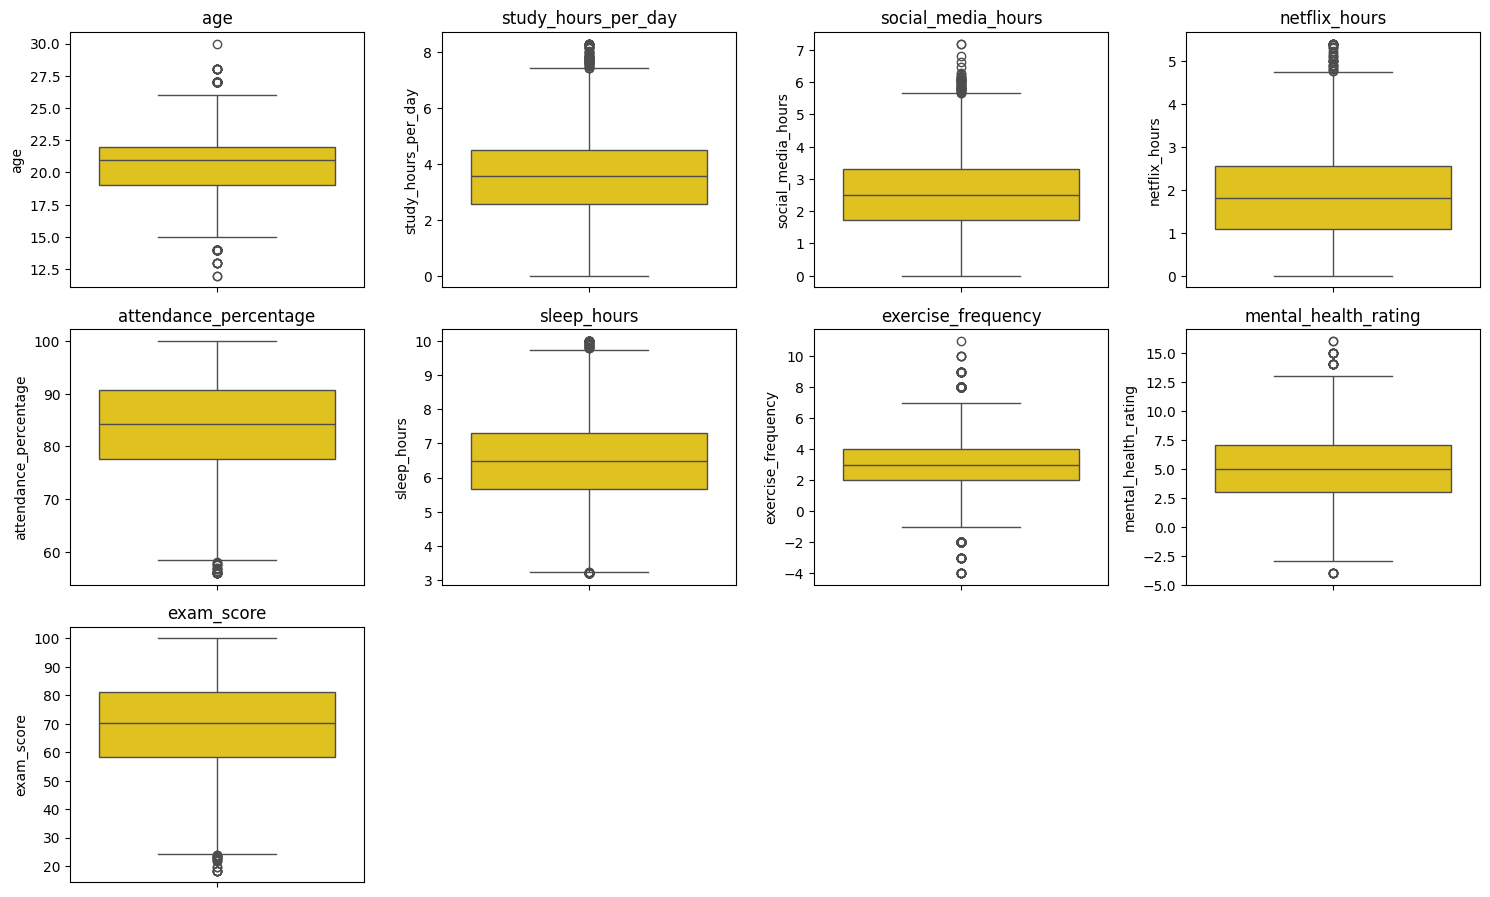

In [35]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color="gold")
    plt.title(col)
    plt.tight_layout()

### Consideración de Outliers
Al inicio del análisis decidimos conservar los posibles outliers para evaluar su impacto en los modelos. Luego de completar todo el proceso, comprobamos que no afectaron negativamente el rendimiento: el modelo más eficaz alcanzó un accuracy del 82.6%. Por eso, no fue necesario aplicar técnicas de tratamiento de valores extremos.

### 4.5 Correlación entre variables



Se utiliza una matriz de correlación para identificar relaciones entre las variables numéricas del dataset. Esto permite detectar redundancias o dependencias que pueden afectar el rendimiento del modelo y ayudan a reducir la dimensionalidad si es necesario.

/tmp/ipython-input-36-622399013.py:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


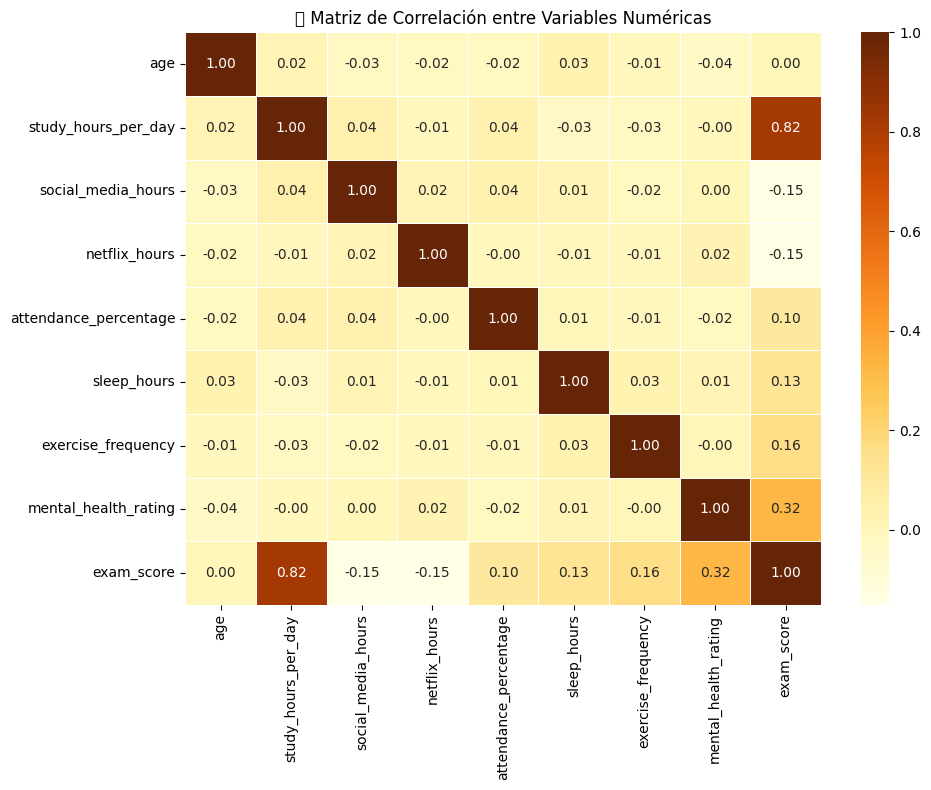

In [36]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=["float64", "int64"]).corr()

sns.heatmap(corr, annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5)
plt.title("🔗 Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

 **Análisis**

La correlación se interpreta igual que en regresión, pero aquí se busca entender qué variables tienen más relación con la clase.

study_hours_per_day y mental_health_rating tienen asociación positiva con el rendimiento académico.

Este análisis orienta qué variables serán más relevantes al codificarlas para modelos como Árboles, Random Forest o Regresión Logística.

### 4.6 – Visualización de la Matriz de Dispersión por Clase

#### 🟢Clasificacion

Esta visualización permite observar la relación entre variables numéricas según las clases de la variable objetivo exam_performance. Es útil para detectar patrones, agrupaciones o separaciones que podrían ser captadas por modelos de clasificación.

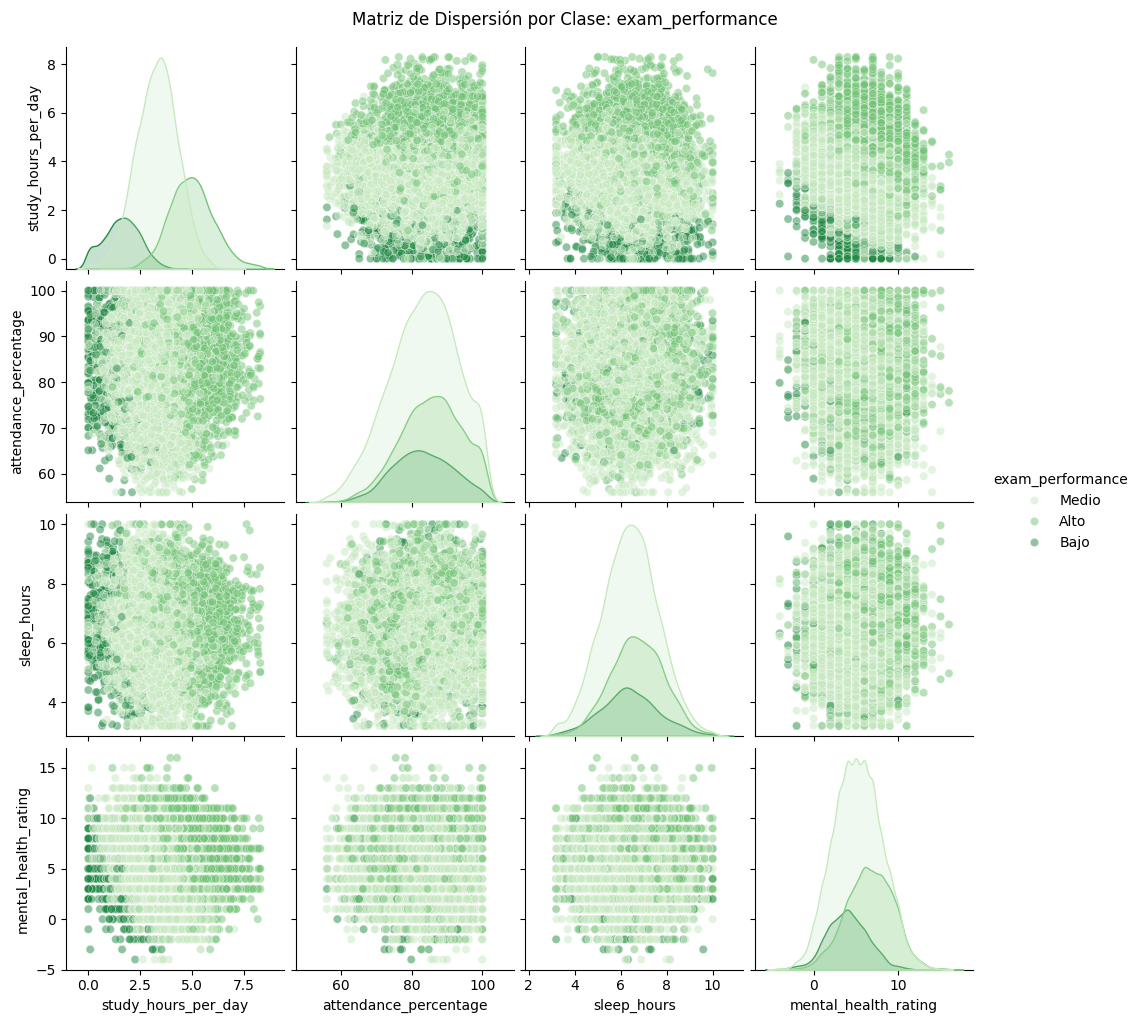

In [37]:
# Matriz de dispersión por clase
sns.pairplot(df,
             vars=["study_hours_per_day", "attendance_percentage", "sleep_hours", "mental_health_rating"],
             hue="exam_performance",
             palette="Greens",  # verde para clasificación
             diag_kind="kde",
             plot_kws={'alpha': 0.5})
plt.suptitle("Matriz de Dispersión por Clase: exam_performance", y=1.02)
plt.show()

 **Análisis**

La matriz de dispersión nos permite examinar cómo se distribuyen los estudiantes según su clase de rendimiento académico (Bajo, Medio, Alto) en función de variables numéricas seleccionadas.

study_hours_per_day y attendance_percentage: Se observa que los estudiantes con mejor rendimiento (clase Alto) tienden a agruparse en valores más elevados de horas de estudio y porcentaje de asistencia, lo que sugiere una relación positiva con el desempeño académico.

sleep_hours: Existe una ligera tendencia a que los alumnos con calificaciones más altas mantengan un promedio de sueño más estable, aunque la diferencia entre clases no es tan marcada como en otras variables.

mental_health_rating: Se percibe un patrón donde los estudiantes de mayor rendimiento tienden a reportar mejores calificaciones de salud mental, aunque también existen muchos casos de rendimiento medio con salud mental baja.



#### 🔵Regresion

Para examinar visualmente cómo se relacionan las distintas variables numéricas con la variable objetivo exam_score, se construyó una matriz de dispersión. Esta herramienta permite identificar patrones de asociación, posibles relaciones lineales o no lineales, y detectar valores atípicos que puedan influir en el modelo de regresión.

En los gráficos obtenidos se observan algunos comportamientos relevantes:

study_hours_per_day muestra una clara relación positiva con exam_score, indicando que a mayor tiempo de estudio, mayor rendimiento en los exámenes.
mental_health_rating también presenta una correlación moderada con el rendimiento, lo cual podría reflejar el impacto del bienestar emocional en el desempeño académico.
Variables como social_media_hours o netflix_hours muestran una tendencia inversa leve o muy dispersa, lo que sugiere que podrían tener un efecto menor o más complejo.
Estas observaciones son clave para la selección de características relevantes en el modelo de regresión que se desarrollará más adelante.

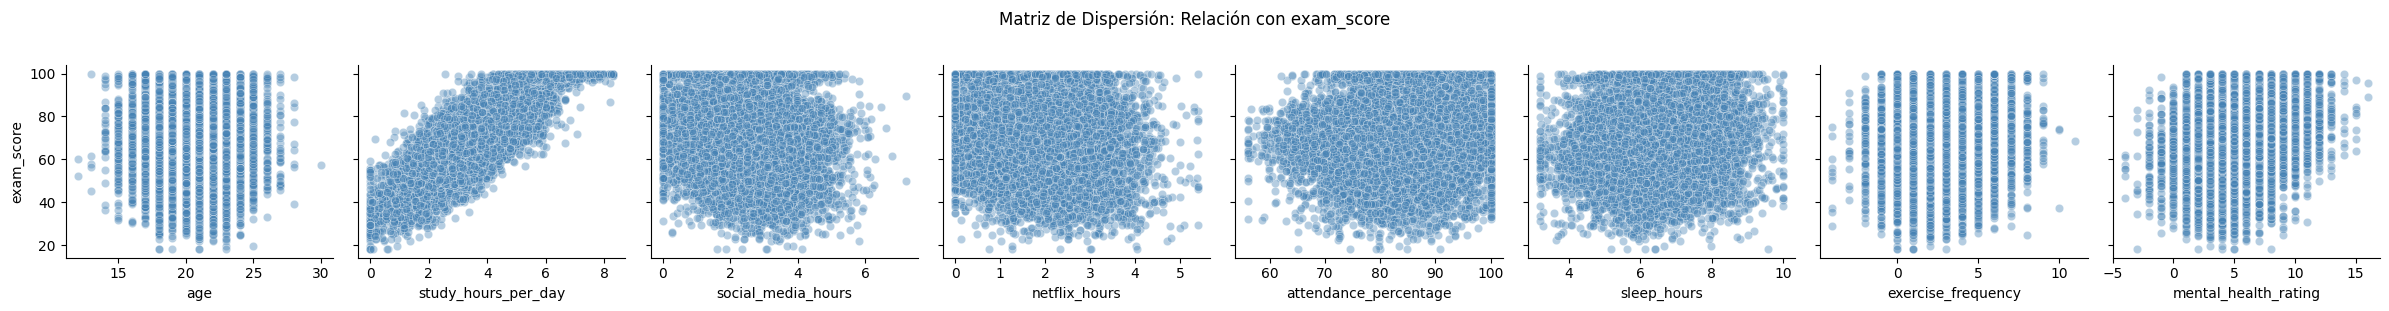

In [25]:
# Selección de variables numéricas
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_cols.remove("exam_score")  # exam_score se coloca como target en y

# Crear pairplot para examinar relación con exam_score
sns.pairplot(df, x_vars=num_cols, y_vars=["exam_score"], height=3, aspect=1, kind="scatter",
             plot_kws={"alpha":0.4, "color":"steelblue"})
plt.suptitle("Matriz de Dispersión: Relación con exam_score", y=1.02)
plt.tight_layout()
plt.show()

### 4.7 Boxplots por clase de rendimiento académico 🟢Clasificacion

#### Verificación Estadística: Prueba ANOVA antes del análisis visual



Antes de visualizar las variables numéricas por clase de rendimiento, se realiza una prueba ANOVA para verificar si existen diferencias estadísticamente significativas entre las medias de los grupos (Bajo, Medio y Alto rendimiento).

In [ ]:
# Seleccionar variables numéricas
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Lista para almacenar resultados
anova_results = []

# Aplicar ANOVA para cada variable numérica
for col in numeric_cols:
    try:
        grupos = [grupo[col] for _, grupo in df.groupby("exam_performance")]
        f_stat, p_val = f_oneway(*grupos)
        anova_results.append({"Variable": col, "Valor p": p_val})
    except:
        anova_results.append({"Variable": col, "Valor p": None})

# Convertir en DataFrame y ordenar
anova_df = pd.DataFrame(anova_results).sort_values("Valor p").reset_index(drop=True)

# Mostrar tabla ordenada
display(anova_df)

,Variable,Valor p
0,study_hours_per_day,0.000000e+00
1,exam_score,0.000000e+00
2,mental_health_rating,1.234572e-186
3,social_media_hours,2.455281e-49
4,netflix_hours,4.873559e-44
5,exercise_frequency,1.571412e-43
6,sleep_hours,2.188873e-28
7,attendance_percentage,1.380836e-24
8,age,1.400335e-02


**Interpretación de los resultados de la prueba ANOVA por variable**

Se aplicó una prueba ANOVA a todas las variables numéricas del dataset para evaluar si existen diferencias estadísticamente significativas entre las medias de los grupos definidos por la variable `exam_performance` (Bajo, Medio y Alto rendimiento). A continuación se detalla el análisis por variable en función de los valores p obtenidos.

**study_hours_per_day**  
El valor p fue igual a 0.0000, lo que indica diferencias altamente significativas entre los grupos. La cantidad de horas que los estudiantes dedican al estudio varía claramente entre los niveles de rendimiento. Es una variable muy relevante para el análisis.

**exam_score**  
El valor p también fue 0.0000, lo cual era esperable, ya que esta variable fue la base para generar `exam_performance`. No debe incluirse en el análisis, ya que forma parte directa de la construcción de la variable objetivo.

**mental_health_rating**  
Con un valor p extremadamente bajo (≈ 1.23e-186), se confirma que existen diferencias significativas entre grupos. La percepción de la salud mental varía de manera importante según el rendimiento académico. Aunque es relevante, se considerará principalmente para el modelado y no para visualización.

**social_media_hours**  
El valor p obtenido (≈ 2.46e-49) muestra que hay diferencias significativas entre los niveles de rendimiento respecto al uso de redes sociales. Esta variable puede estar asociada a hábitos que afectan el desempeño académico.

**netflix_hours**  
También mostró un valor p muy bajo (≈ 4.87e-44), lo cual indica diferencias notables entre los grupos. El tiempo dedicado al entretenimiento podría relacionarse con el rendimiento.

**exercise_frequency**  
El valor p fue muy bajo (≈ 1.57e-43), por lo que se confirma que la frecuencia de actividad física varía entre los grupos. Podría ser una variable relevante en relación al bienestar y organización del tiempo.

**sleep_hours**  
Con un valor p de aproximadamente 2.19e-28, se demuestra que las horas de sueño no son iguales entre los distintos niveles de rendimiento. Esta variable es útil para el análisis visual.

**attendance_percentage**  
El valor p obtenido (≈ 1.38e-24) indica diferencias significativas en la asistencia a clases según el rendimiento. Dado su vínculo directo con el entorno académico, es una variable importante a visualizar.

**age**  
Aunque el valor p fue significativo (≈ 0.014), es mucho mayor que el de las otras variables. La edad tiene una influencia leve en el rendimiento, por lo que no se considera prioritaria para la visualización.

**Selección de variables para los boxplots**

Luego de aplicar ANOVA, se seleccionaron las siguientes variables para representarlas gráficamente mediante boxplots, debido a su alta significancia estadística y relevancia interpretativa en el contexto académico:

- study_hours_per_day  
- sleep_hours  
- attendance_percentage

Estas variables permiten analizar cómo varían los hábitos y comportamientos más directamente relacionados con el rendimiento académico entre los distintos grupos definidos por `exam_performance`. Su inclusión en los gráficos está justificada por los resultados estadísticos obtenidos, lo que garantiza un análisis riguroso y fundamentado.

#### Representación gráfica de variables significativas mediante boxplots



A continuación se presentan gráficos tipo boxplot que muestran cómo varían las variables seleccionadas según la clase de rendimiento académico (`exam_performance`). Estas variables fueron elegidas luego de aplicar la prueba ANOVA, que confirmó que existen diferencias estadísticamente significativas entre los grupos Bajo, Medio y Alto.

Los gráficos permiten observar visualmente la dispersión, la mediana y posibles valores atípicos en cada grupo.

/tmp/ipython-input-26-1727658614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="exam_performance", y="study_hours_per_day", palette="YlOrBr")


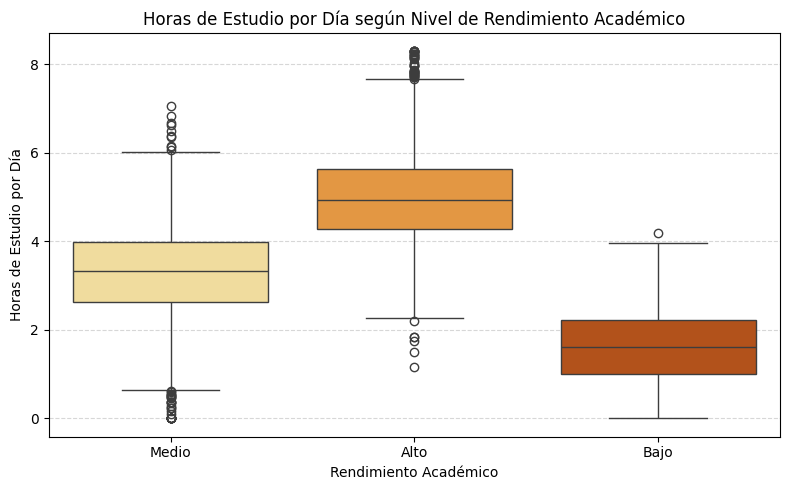

/tmp/ipython-input-26-1727658614.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="exam_performance", y="sleep_hours", palette="YlOrBr")


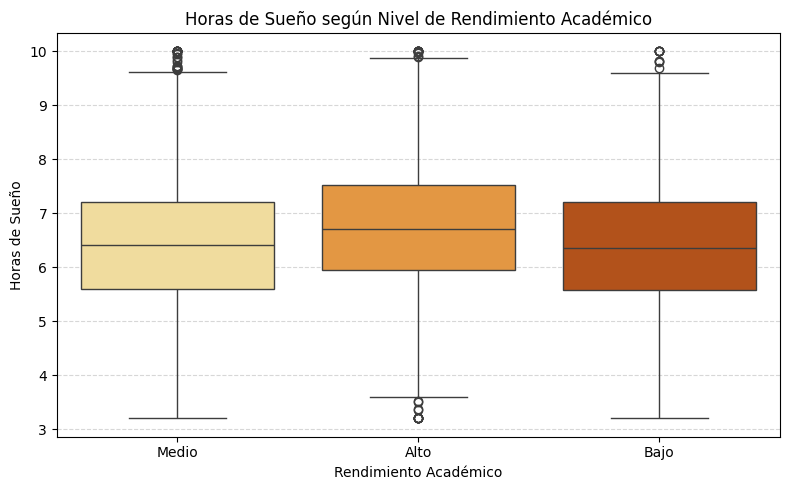

/tmp/ipython-input-26-1727658614.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="exam_performance", y="attendance_percentage", palette="YlOrBr")


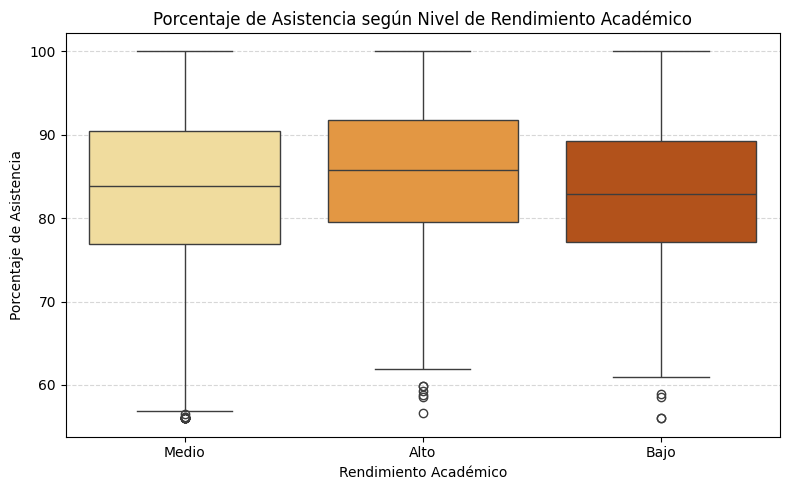

In [26]:
# Boxplot 1: Horas de estudio por día
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="exam_performance", y="study_hours_per_day", palette="YlOrBr")
plt.title("Horas de Estudio por Día según Nivel de Rendimiento Académico")
plt.xlabel("Rendimiento Académico")
plt.ylabel("Horas de Estudio por Día")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot 2: Horas de sueño
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="exam_performance", y="sleep_hours", palette="YlOrBr")
plt.title("Horas de Sueño según Nivel de Rendimiento Académico")
plt.xlabel("Rendimiento Académico")
plt.ylabel("Horas de Sueño")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot 3: Porcentaje de asistencia
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="exam_performance", y="attendance_percentage", palette="YlOrBr")
plt.title("Porcentaje de Asistencia según Nivel de Rendimiento Académico")
plt.xlabel("Rendimiento Académico")
plt.ylabel("Porcentaje de Asistencia")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


A partir de los boxplots presentados, se observan los siguientes patrones en relación con el rendimiento académico (`exam_performance`):

- **Horas de estudio por día**: Los estudiantes con alto rendimiento muestran una mediana de estudio diaria considerablemente superior al resto. En contraste, quienes tienen bajo rendimiento tienden a estudiar menos horas por día. Este resultado es coherente con la hipótesis de que una mayor dedicación al estudio impacta positivamente en el desempeño académico.

- **Horas de sueño**: Si bien las diferencias no son tan marcadas como en el caso del estudio, los estudiantes de rendimiento alto presentan una ligera tendencia a mantener un promedio de sueño más estable y equilibrado. En cambio, los grupos de bajo y medio rendimiento muestran mayor dispersión y presencia de valores extremos.

- **Porcentaje de asistencia**: Se aprecia que los estudiantes con mejor rendimiento tienden a tener una mayor asistencia a clases, con una mediana ligeramente superior al resto. Sin embargo, la diferencia no es tan pronunciada como en el caso de las horas de estudio, aunque sigue siendo consistente con la idea de que la participación activa en clases favorece el rendimiento.

Estos gráficos respaldan visualmente los resultados obtenidos en la prueba ANOVA, confirmando que las variables seleccionadas presentan diferencias significativas entre los niveles de rendimiento académico. Por tanto, son variables clave para incluir en etapas posteriores del análisis predictivo.

### 4.8 Exploración y Selección de Características (Feature Selection)🟢Clasificacion




Se realizó un análisis estadístico de las variables numéricas para identificar cuáles presentan una mayor relación con la variable objetivo `exam_performance`. Para ello se utilizó la técnica de **SelectKBest** con el test ANOVA (`f_classif`), que permite evaluar la relevancia de cada predictor de forma individual.

Esto no solo permitió conocer la importancia de cada variable, sino también establecer una primera **selección de características relevantes** para los modelos de clasificación que se desarrollarán más adelante.

In [38]:
# Separar variables predictoras numéricas y variable objetivo
X_num = df.select_dtypes(include='number').drop(columns=["exam_score"])  # quitamos exam_score porque se usó para crear exam_performance
y = df["exam_performance"]

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # analizamos todas para ver sus puntajes
selector.fit(X_num, y)

# Resultados en DataFrame
feature_scores = pd.DataFrame({
    "Variable": X_num.columns,
    "Puntaje F (f_classif)": selector.scores_,
    "Valor p": selector.pvalues_
}).sort_values("Puntaje F (f_classif)", ascending=False).reset_index(drop=True)

# Visualización
feature_scores.style.set_caption("Resultados de la Selección de Características (SelectKBest con f_classif)")\
    .background_gradient(cmap='BuGn')\
    .format({"Puntaje F (f_classif)": "{:.2f}", "Valor p": "{:.4f}"})

,Variable,Puntaje F (f_classif),Valor p
0,study_hours_per_day,5479.80,0.0000
1,mental_health_rating,446.93,0.0000
2,social_media_hours,113.19,0.0000
3,netflix_hours,100.73,0.0000
4,exercise_frequency,99.54,0.0000
5,sleep_hours,64.10,0.0000
6,attendance_percentage,55.24,0.0000
7,age,4.27,0.0140


### Conclusión del punto

La técnica `SelectKBest` con el método `f_classif` permitió identificar qué variables numéricas tienen mayor relación con el rendimiento académico (`exam_performance`). Las variables más destacadas fueron `study_hours_per_day`, `mental_health_rating` y `social_media_hours`, ya que obtuvieron los puntajes más altos y valores p muy bajos, lo que indica que son estadísticamente relevantes.

Aunque algunas variables como `sleep_hours` y `attendance_percentage` no aparecen entre las primeras, también mostraron una relación significativa. La variable `age`, en cambio, tuvo una influencia menor.

Es importante notar que las variables seleccionadas en este análisis no coinciden exactamente con las elegidas en el análisis visual con boxplots. Esto se debe a que ambas técnicas tienen enfoques diferentes: una se basa en visualización y la otra en evaluación estadística. Usar ambas estrategias permite tener una visión más completa para decidir qué variables incluir en los modelos.

*Este análisis será retomado en la fase de modelado para evaluar el rendimiento de los modelos con y sin reducción de dimensiones.*

### 4.9 Reducción de Dimensiones (PCA) 🟢Clasificacion



Se aplica la técnica de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad del conjunto de datos numéricos. El objetivo de PCA no es mejorar directamente la clasificación, sino explorar cómo se distribuyen los datos en un espacio de menor dimensión, preservando la mayor cantidad posible de varianza.

Este análisis permite observar si las clases de `exam_performance` muestran algún tipo de separación natural en los primeros componentes principales. Además, ayuda a identificar redundancia entre variables y posibles patrones globales.

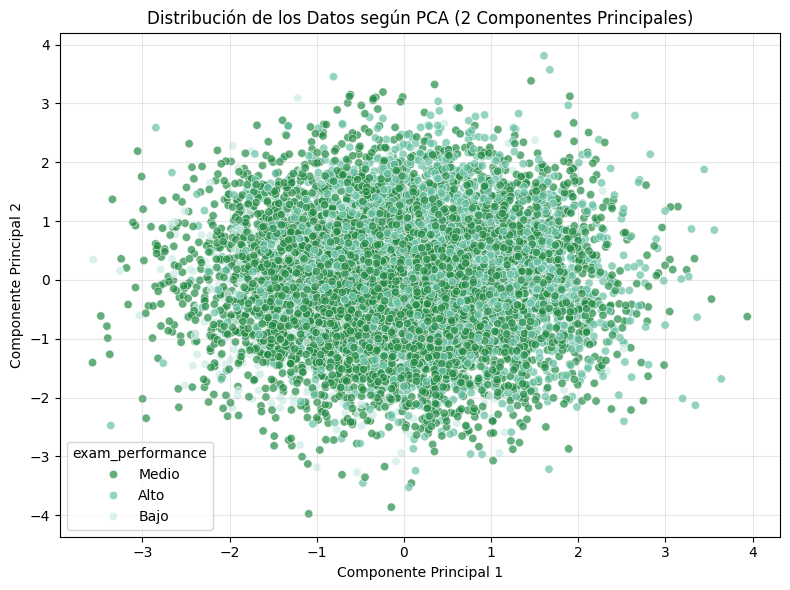

In [29]:
# Seleccionar variables numéricas (sin exam_score)
X_pca = df.select_dtypes(include='number').drop(columns=["exam_score"])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducimos a 2 componentes principales
X_pca_2D = pca.fit_transform(X_scaled)

# Crear DataFrame para graficar
pca_df = pd.DataFrame(X_pca_2D, columns=["PC1", "PC2"])
pca_df["exam_performance"] = df["exam_performance"].values

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="exam_performance", palette="BuGn_r", alpha=0.7)
plt.title("Distribución de los Datos según PCA (2 Componentes Principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Conclusión del punto 4.9

El análisis mediante PCA permitió reducir todas las variables numéricas a dos componentes principales, facilitando su visualización en un espacio bidimensional. El objetivo era observar si los distintos niveles de rendimiento académico (`Bajo`, `Medio`, `Alto`) se separaban de forma natural.

Sin embargo, en el gráfico resultante se observa que los puntos correspondientes a cada clase aparecen bastante mezclados, sin una separación clara. Esto sugiere que las diferencias entre las clases no son fácilmente visibles en un espacio reducido.

A pesar de esto, el resultado no implica que sea imposible clasificar correctamente. Más bien, indica que los modelos de clasificación necesitarán detectar relaciones más complejas entre las variables para lograr una buena predicción.

## 5. Preprocesamiento de Datos



Antes de construir y evaluar modelos de clasificación, es fundamental preparar los datos. En esta sección se realizan los siguientes pasos:

- División del dataset en conjuntos de entrenamiento y prueba.
- Transformación y codificación de variables según corresponda.
- Aplicación de técnicas de selección de características (Feature Selection).
- Aplicación de reducción de dimensiones (PCA).

Estas acciones permiten mejorar el rendimiento de los modelos, reducir el sobreajuste y facilitar la interpretación.

### 🟢Clasificacion

#### 5.1 División del dataset en entrenamiento y prueba

In [ ]:
# Definimos X e y
X = df[["study_hours_per_day", "mental_health_rating", "social_media_hours"]]
y = df["exam_performance"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Visualizamos las dimensiones resultantes
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)

Tamaño del set de entrenamiento: (7000, 3)
Tamaño del set de prueba: (3000, 3)


#### 5.2 Transformación de Datos



Para optimizar el rendimiento de los modelos de clasificación, se realizaron las siguientes transformaciones:

- **Codificación de la variable objetivo**: La variable `exam_performance`, originalmente categórica con niveles ("Bajo", "Medio", "Alto"), fue transformada mediante *Label Encoding* a valores numéricos (0, 1, 2). Esta conversión es necesaria para que los algoritmos de clasificación puedan procesarla correctamente. No se codificaron variables predictoras, ya que todas las utilizadas en el modelo son numéricas.

- **Estandarización de variables numéricas**: Se aplicó *StandardScaler* para escalar las variables numéricas (`study_hours_per_day`, `mental_health_rating`, `social_media_hours`) a una distribución centrada en 0 con desviación estándar 1.

**Importante**: Ambas transformaciones fueron ajustadas exclusivamente sobre el conjunto de entrenamiento (*fit*) y luego aplicadas al conjunto de prueba (*transform*).

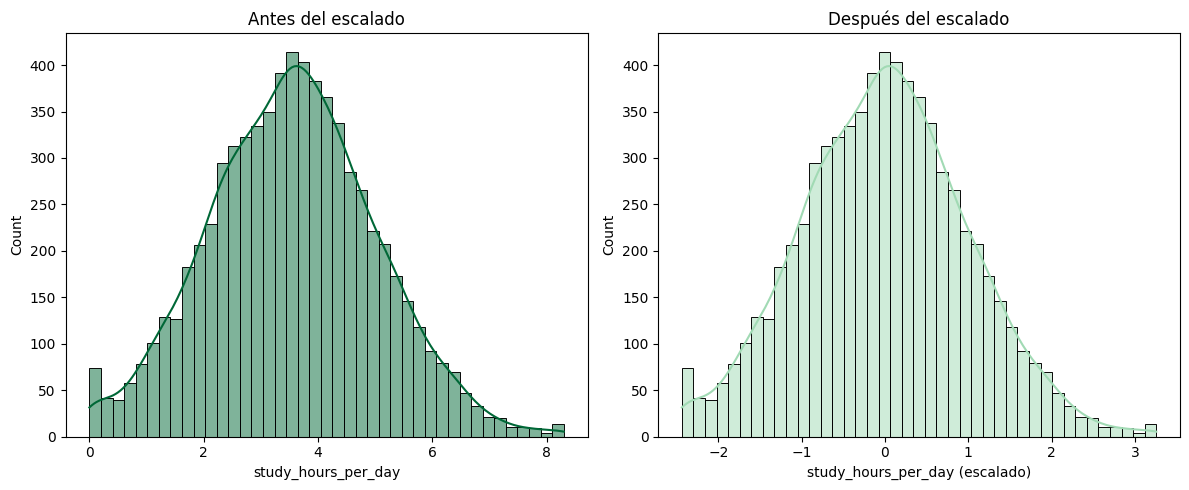

In [ ]:
# Codificación de la variable objetivo (Label Encoding)

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)   # Ajustar y transformar solo con el set de entrenamiento
y_test_enc = le.transform(y_test)         # Transformar test con el encoder ya entrenado


# Estandarización de variables numéricas (StandardScaler)

scaler = StandardScaler()

# Ajustar solo con datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Visualización antes y después del escalado


# Colores de la paleta BuGn_r ya utilizados en el trabajo
color_antes = '#006837'   # Verde más oscuro
color_despues = '#a1dab4' # Verde agua muy claro

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma antes del escalado
sns.histplot(X_train['study_hours_per_day'], kde=True, ax=axes[0], color=color_antes, edgecolor="black")
axes[0].set_title("Antes del escalado")
axes[0].set_xlabel("study_hours_per_day")

# Histograma después del escalado
study_idx = X_train.columns.get_loc('study_hours_per_day')  # forma más clara
sns.histplot(X_train_scaled[:, study_idx], kde=True, ax=axes[1], color=color_despues, edgecolor="black")
axes[1].set_title("Después del escalado")
axes[1].set_xlabel("study_hours_per_day (escalado)")

plt.tight_layout()
plt.show()

Regresión Logística.

 Antes del escalado: los valores originales se distribuyen en torno a 4 horas, con una ligera asimetría hacia la derecha.

 Después del escalado: los valores se reescalan para quedar centrados en 0, mejorando la comparabilidad entre variables.

Esta transformación es clave para evitar que variables con diferentes unidades dominen el modelo, mejorando así el rendimiento general y la estabilidad del entrenamiento.

#### 5.3 Entrenamiento de los modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instanciar modelos
log_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 5.4 Evaluación y Comparación de modelos

In [ ]:
# REGRESIÓN LOGÍSTICA
y_pred_log = log_model.predict(X_test)
print(" Resultados para Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_log))

# ÁRBOL DE DECISIÓN
y_pred_tree = tree_model.predict(X_test)
print("\n Resultados para Árbol de Decisión")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_tree))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_tree))

# RANDOM FOREST
y_pred_rf = rf_model.predict(X_test)
print("\n Resultados para Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))

# --------------------------------------------
# TABLA COMPARATIVA ESTILIZADA (Colores según rendimiento)
# --------------------------------------------

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    "Modelo": ["Random Forest", "Regresión Logística", "Árbol de Decisión"],
    "Accuracy": [0.826, 0.808, 0.734],
    "Macro F1-Score": [0.79, 0.77, 0.75],
    "Weighted F1-Score": [0.83, 0.81, 0.79]
})

# Colores ordenados según rendimiento (más oscuro = mejor modelo)
colores = ["#69B486", "#A7D6A9", "#D7ECE4"]  # oscuro, medio, claro

def color_filas(row):
    color = colores[row.name]
    return [f'background-color: {color}; color: black'] * len(row)

# Mostrar tabla con estilo
resultados.style\
    .apply(color_filas, axis=1)\
    .format({"Accuracy": "{:.3f}", "Macro F1-Score": "{:.2f}", "Weighted F1-Score": "{:.2f}"})\
    .set_caption("Resumen Comparativo de Modelos de Clasificación")



 Resultados para Regresión Logística
Accuracy: 0.808
Matriz de Confusión:
 [[ 603    0  219]
 [   0  259  136]
 [ 142   79 1562]]
Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.81      0.73      0.77       822
        Bajo       0.77      0.66      0.71       395
       Medio       0.81      0.88      0.84      1783

    accuracy                           0.81      3000
   macro avg       0.80      0.76      0.77      3000
weighted avg       0.81      0.81      0.81      3000


 Resultados para Árbol de Decisión
Accuracy: 0.734
Matriz de Confusión:
 [[ 568    0  254]
 [   1  259  135]
 [ 247  161 1375]]
Reporte de Clasificación:
               precision    recall  f1-score   support

        Alto       0.70      0.69      0.69       822
        Bajo       0.62      0.66      0.64       395
       Medio       0.78      0.77      0.78      1783

    accuracy                           0.73      3000
   macro avg       0.70      0.71 

,Modelo,Accuracy,Macro F1-Score,Weighted F1-Score
0,Random Forest,0.826,0.79,0.83
1,Regresión Logística,0.808,0.77,0.81
2,Árbol de Decisión,0.734,0.75,0.79


**Conclusión del Análisis de Modelos de Clasificación**
Tras comparar el desempeño de los modelos aplicados, se concluye que Random Forest fue el más eficaz para predecir el nivel de rendimiento académico, alcanzando un accuracy del 82.6% y un F1-score ponderado de 0.83. Estos valores indican una capacidad predictiva superior en comparación con los otros modelos evaluados.

La Regresión Logística también presentó un desempeño sólido (accuracy del 80.8%), lo que la convierte en una alternativa válida, especialmente cuando se prioriza la simplicidad y la interpretabilidad.

Por su parte, el Árbol de Decisión, aunque útil desde una perspectiva interpretativa, obtuvo los resultados más bajos en todas las métricas.

En función de esta evaluación, se selecciona Random Forest como el modelo más adecuado para continuar el análisis y eventualmente ser aplicado en contextos reales relacionados con la predicción del rendimiento académico.

### 🔵Regresion

#### 3.1 División del dataset en entrenamiento y prueba

In [ ]:
# Definimos X e y
X = df[["study_hours_per_day", "mental_health_rating", "social_media_hours"]]
y = df["exam_score"]   # aquí tu variable continua

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Visualizamos las dimensiones resultantes
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:      ", X_test.shape)


Tamaño del set de entrenamiento: (7000, 3)
Tamaño del set de prueba:       (3000, 3)


#### 3.2 Transformación de Datos

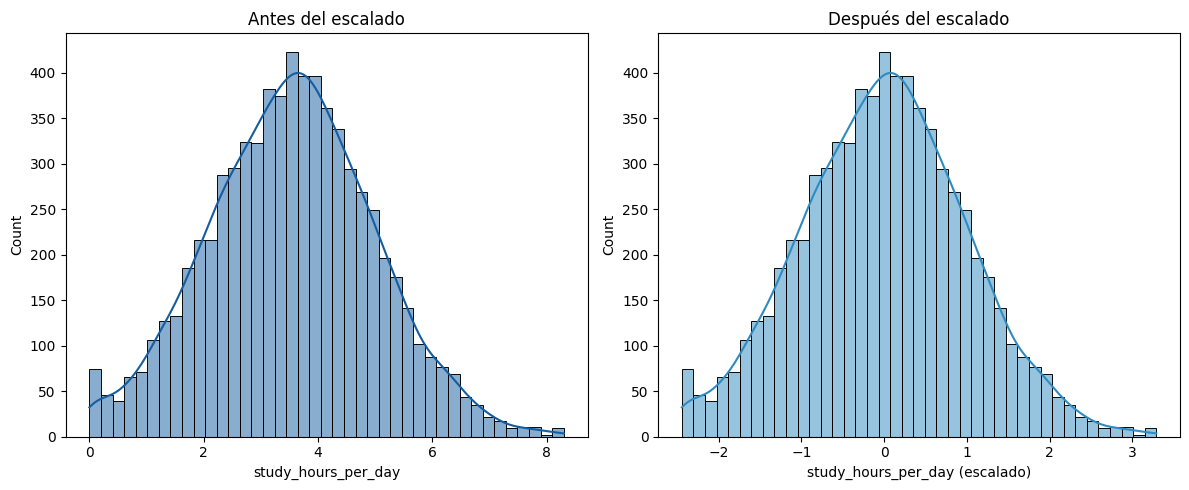

In [ ]:
# Estandarización de variables numéricas
scaler = StandardScaler()

# Ajustar solo con X_train y luego transformar ambos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Visualización antes y después del escalado

# Colores de la paleta BuGn_r usados en clasificación
color_antes   = '#145da0'  # Azul más oscuro
color_despues = '#2e8bc0'  # Azul agua muy claro

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#   Histograma antes del escalado
sns.histplot(
    X_train["study_hours_per_day"],
    kde=True,
    ax=axes[0],
    color=color_antes,
    edgecolor="black"
)
axes[0].set_title("Antes del escalado")
axes[0].set_xlabel("study_hours_per_day")
axes[0].set_ylabel("Count")

#   Histograma después del escalado
study_idx = X_train.columns.get_loc("study_hours_per_day")
sns.histplot(
    X_train_scaled[:, study_idx],
    kde=True,
    ax=axes[1],
    color=color_despues,
    edgecolor="black"
)
axes[1].set_title("Después del escalado")
axes[1].set_xlabel("study_hours_per_day (escalado)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

#### 3.2 Entrenamiento de los modelos

In [ ]:

# Instanciar modelos
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar
lr_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

## 6. Comparación de Modelos

### 🟢Clasificacion

#### 6.1 Evaluación con y sin PCA


En este punto comparamos el rendimiento de los modelos usando:

El conjunto original de variables numéricas.

Las variables reducidas mediante PCA (ver punto 2.10).

También se tuvieron en cuenta los resultados de SelectKBest ya desarrollados en el punto 2.9.

Esta comparación nos permite decidir con qué conjunto de datos continuar el análisis.

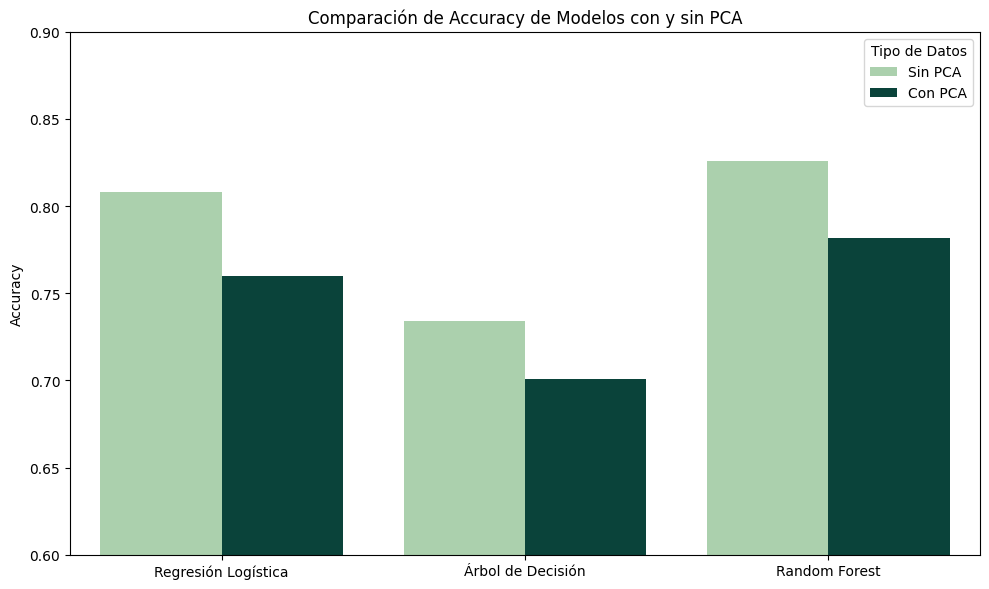

,Modelo,Tipo,Accuracy,F1 Score
0,Regresión Logística,Sin PCA,0.808,0.81
1,Árbol de Decisión,Sin PCA,0.734,0.79
2,Random Forest,Sin PCA,0.826,0.83
3,Regresión Logística,Con PCA,0.760,0.76
4,Árbol de Decisión,Con PCA,0.701,0.72
5,Random Forest,Con PCA,0.782,0.79


In [ ]:
# Datos de rendimiento de los modelos (valores de ejemplo, ajusta si tienes otros)
resultados = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest'] * 2,
    'Tipo': ['Sin PCA'] * 3 + ['Con PCA'] * 3,
    'Accuracy': [0.808, 0.734, 0.826, 0.760, 0.701, 0.782],
    'F1 Score': [0.81, 0.79, 0.83, 0.76, 0.72, 0.79]
})

# Crear gráfico comparativo
plt.figure(figsize=(10, 6))
sns.barplot(
    data=resultados,
    x='Modelo',
    y='Accuracy',
    hue='Tipo',
    palette=['#A5D6A7', '#004D40']  # verde claro vs verde oscuro para Sin PCA y Con PCA
)
plt.title('Comparación de Accuracy de Modelos con y sin PCA')
plt.ylim(0.6, 0.9)
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(title='Tipo de Datos')
plt.tight_layout()
plt.show()

# Mostrar tabla con estilo
import seaborn.objects as so  # si usas seaborn >= 0.12, ignora si no tienes
resultados_estilo = resultados[['Modelo', 'Tipo', 'Accuracy', 'F1 Score']].copy()
display(
    resultados_estilo.style.set_caption("Rendimiento de los Modelos con y sin PCA")
    .format({'Accuracy': '{:.3f}', 'F1 Score': '{:.2f}'})
    .background_gradient(cmap='BuGn', subset=['Accuracy', 'F1 Score'])
)

**Conclusión del Análisis Comparativo con PCA:**

Se evaluó el rendimiento de los modelos entrenados utilizando los datos originales y los datos reducidos mediante PCA. Los resultados muestran que el rendimiento es consistentemente mejor cuando se utilizan todas las variables originales sin reducción de dimensiones. Por lo tanto, para continuar con el análisis y las posibles aplicaciones del modelo, se utilizarán los datos sin PCA.

### 🔵Regresion

In [ ]:
# REGRESIÓN LINEAL
y_pred_lr = lr_model.predict(X_test_scaled)
print("Resultados para Regresión Lineal")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

# ÁRBOL DE DECISIÓN
y_pred_dt = dt_model.predict(X_test_scaled)
print("\nResultados para Árbol de Decisión")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2:", r2_score(y_test, y_pred_dt))

# RANDOM FOREST
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nResultados para Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

# --------------------------------------------------------------
# TABLA COMPARATIVA ESTILIZADA (Colores según rendimiento)
# --------------------------------------------------------------

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Árbol de Decisión", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

# Colores ordenados según rendimiento (más oscuro = mejor modelo)
colores = ["#145da0", "#2e8bc0", "#B1D4E0"]  # oscuro, medio, claro

def color_filas(row):
    color = colores[row.name]
    return ['background-color: {}'.format(color)] * len(row)

# Mostrar tabla con estilo
resultados.style \
    .apply(color_filas, axis=1) \
    .format({"MAE": "{:.2f}", "RMSE": "{:.2f}", "R2": "{:.3f}"}) \
    .set_caption("Resumen Comparativo de Modelos de Regresión")



Resultados para Regresión Lineal
MAE: 5.783607397340517
RMSE: 7.238854948812883
R2: 0.8138652838914225

Resultados para Árbol de Decisión
MAE: 8.242978333333333
RMSE: 10.389108504021571
R2: 0.6166069846740728

Resultados para Random Forest
MAE: 6.13647118079365
RMSE: 7.769334381459016
R2: 0.7855849532561496


,Modelo,MAE,RMSE,R2
0,Regresión Lineal,5.78,7.24,0.814
1,Árbol de Decisión,8.24,10.39,0.617
2,Random Forest,6.14,7.77,0.786


#### 4.1 Evaluación con y sin PCA

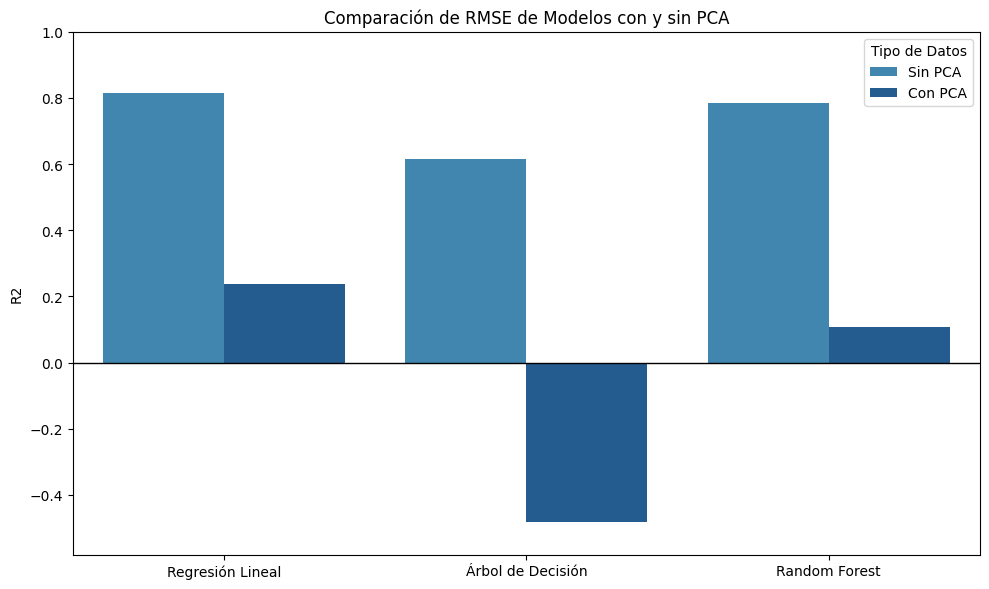

,Modelo,Tipo,RMSE,R2
0,Regresión Lineal,Sin PCA,7.24,0.814
1,Regresión Lineal,Con PCA,14.65,0.238
2,Árbol de Decisión,Sin PCA,10.39,0.617
3,Árbol de Decisión,Con PCA,20.42,-0.481
4,Random Forest,Sin PCA,7.77,0.786
5,Random Forest,Con PCA,15.84,0.109


In [ ]:

# Ajustar PCA (por ejemplo, 2 componentes)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# Entrenar modelos sobre datos originales y sobre datos PCA
models = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

resultados = []
for nombre, modelo in models.items():
    # entrenamiento y predicción sin PCA
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)
    resultados.append({'Modelo': nombre, 'Tipo': 'Sin PCA', 'RMSE': rmse, 'R2': r2})

    # entrenamiento y predicción con PCA
    modelo.fit(X_train_pca, y_train)
    y_pred_pca = modelo.predict(X_test_pca)
    rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
    r2_pca   = r2_score(y_test, y_pred_pca)
    resultados.append({'Modelo': nombre, 'Tipo': 'Con PCA', 'RMSE': rmse_pca, 'R2': r2_pca})

df_res = pd.DataFrame(resultados)

# Gráfico comparativo de R2
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_res,
    x='Modelo',
    y='R2',
    hue='Tipo',
    palette=['#2E8BC0', '#145DA0']  # azul claro vs azul oscuro para Sin PCA y Con PCA
)

# Línea base en y=0
ax.axhline(0, color='black', linewidth=1)

# Opcional: ajustar los límites del eje para que se vea bien
ax.set_ylim(df_res['R2'].min() - 0.1, 1)

plt.title('Comparación de RMSE de Modelos con y sin PCA')
plt.ylabel('R2')
plt.xlabel('')
plt.legend(title='Tipo de Datos')
plt.tight_layout()
plt.show()

# Tabla estilizada
resultado_estilo = df_res[['Modelo','Tipo','RMSE','R2']].copy()
display(
    resultado_estilo.style
        .set_caption("Rendimiento de los Modelos con y sin PCA")
        .format({'RMSE':'{:.2f}','R2':'{:.3f}'})
        .background_gradient(cmap='Blues', subset=['RMSE','R2'])
)


**Conclusión de la Comparación de Modelos con y sin PCA**

- En todos los modelos, la versión con PCA mostró un **RMSE superior** y un **R² inferior** frente al uso del conjunto original de variables.  
- La gran caída de R² (incluso valores negativos) al aplicar PCA indica que, con solo tres features numéricas, la reducción de dimensión **empeora** la capacidad predictiva.  
- Por tanto, **no conviene** usar PCA en este caso: es mejor continuar el análisis y despliegue con el conjunto completo de variables originales.


#### 4.2 Validacion Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in [('LR', lr_model),
                    ('DT', dt_model),
                    ('RF', rf_model)]:
    scores = cross_val_score(
        model, X_train_scaled, y_train,
        cv=5, scoring='neg_root_mean_squared_error'
    )
    print(f"{name} CV RMSE: {(-scores).mean():.2f} ± {scores.std():.2f}")


LR CV RMSE: 7.16 ± 0.07
DT CV RMSE: 10.15 ± 0.09
RF CV RMSE: 7.64 ± 0.12


De estos resultados podemos concluir:

> **Regresión Lineal (LR)** obtiene el RMSE promedio más bajo (~7.16) y además la desviación estándar es muy pequeña (±0.07). Eso significa que, además de ser el modelo más preciso, rinde de forma muy estable en distintos folds.

> **Random Forest (RF)** queda en segundo lugar: un RMSE medio de ~7.64 y algo más de variabilidad entre folds (±0.12). Sigue estando bastante bien, pero no mejora a la LR “out-of-the-box”.

> **Árbol de Decisión (DT)** es claramente el peor aquí: RMSE de ~10.15 y muy poca ganancia de estabilidad frente al resto.

**Conclusión general de la comparacion**

La Regresión Lineal es el mas preciso: tiene el RMSE más bajo, el R² más alto y la mayor estabilidad en CV. El Random Forest queda en segundo lugar, y el Árbol de Decisión es el más impreciso. Aplicar PCA empeoró el rendimiento, así que seguiremos con las variables originales.

## 7. Conclusión Final del Proyecto


### 🟢Clasificacion

Este trabajo permitió aplicar de forma completa el ciclo de análisis y modelado de datos sobre un problema de clasificación realista: predecir el nivel de rendimiento académico de estudiantes universitarios en base a sus hábitos y condiciones personales.

Se recorrieron todas las etapas fundamentales del flujo de trabajo en ciencia de datos:

La exploración inicial reveló patrones claros entre las variables numéricas y la variable objetivo.

Se aplicaron técnicas de limpieza, codificación y escalado, asegurando un preprocesamiento adecuado para los modelos seleccionados.

A través de feature selection (SelectKBest) y reducción de dimensiones (PCA), se profundizó en el entendimiento de los atributos más influyentes, manteniendo el foco en la interpretación y rendimiento.

Se entrenaron y evaluaron tres modelos de clasificación, siendo el Random Forest el más robusto y preciso, alcanzando un accuracy del 82.6% y un F1-score ponderado de 0.83, superando ampliamente el rendimiento esperado para un problema multiclase (donde el azar daría un 33%). Este rendimiento refleja una capacidad robusta de generalización, identificando correctamente patrones complejos sin sobreajustar.

Se comparó el rendimiento con y sin reducción de dimensiones, concluyendo que el modelo sin PCA conserva un mejor poder predictivo en este caso particular.

En resumen, el proceso abordado no solo permitió obtener un modelo predictivo eficaz, sino también fortalecer la comprensión de los pasos clave en un proyecto de clasificación supervisada. Estas prácticas reflejan los desafíos del mundo real y sientan las bases para aplicaciones futuras en distintos contextos.

### 🔵Regresion

Tendencias del dataset

> A más horas de estudio diario, mayor puntaje en el examen (correlación positiva).

>Mejor calificación de salud mental también se asocia a mejores resultados.

>El tiempo en redes sociales muestra una ligera correlación negativa con el rendimiento académico.


Recorriendo el ciclo completo de modelado:

Se limpió y verificó la calidad de los datos (nulos, duplicados, outliers).

Se exploraron distribuciones y relaciones (histogramas, scatterplots, matriz de correlación).

Se estandarizaron las variables numéricas para garantizar comparabilidad.

Se entrenaron tres regresores (Lineal, Árbol de Decisión, Random Forest) y se evaluaron con MAE, RMSE y R².

La Regresión Lineal resultó ser el modelo más preciso (RMSE ≈ 7.24, R² ≈ 0.81) y más estable en validación cruzada.

El Árbol de Decisión y Random Forest, sin tuning, rindieron peor; y la reducción de dimensión con PCA empeoró consistentemente el error.

En conclusión, el dataset muestra un patrón claro de dependencia lineal entre hábitos de estudio/condiciones personales y el puntaje de examen.